In [1]:
import sys
#change the path to the src directory in your local
sys.path.append('/Users/asim/Desktop/github/planning/src')

In [2]:
from typing import Dict, List, Tuple, Type
from util import UserProfile, savings_fixed_policy
from distributions import GBM
import plots
import numpy as np
import random
import json
import pandas as pd

In [3]:
# create a profile for linda
linda = UserProfile (40, 0, 25, 150_000, 100_000,  0.03, 0.107, 0, True)

Use the following link to get projection from CNN retirement calculator

https://www.cnn.com/business/calculators/retirement-calculator

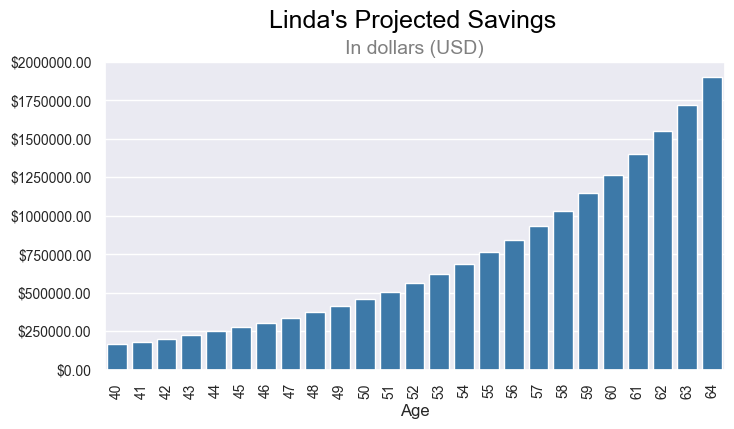

In [5]:
linda = UserProfile (40, 1_904_504, 25, 150_000, 100_000,  0.03, 0.107, 0, True)
savings = savings_fixed_policy(linda, contrib = 0)
plots.plot_bar(savings, linda)

How does the projection change when we consider the uncertainty in market performance in the simulation? Let's find out by setting the portfolio_std in Linda's profile equal to the standard deviation of the S&P 500 Index Fund, which is 15.31%.

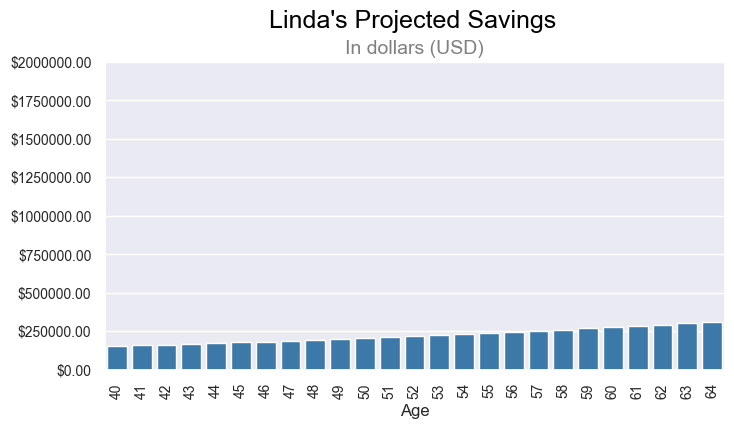

In [6]:
linda = UserProfile (40, 1_904_504, 25, 150_000, 100_000,  0.03, 0.107, 0.1531, True)
savings = savings_fixed_policy(linda, contrib=0, seed=2)
plots.plot_bar(savings, linda)

### Monte Carlo Simulations

In [8]:
n_sim = 10000
savings_simulations = np.zeros([n_sim, linda.target_year])
seeds = np.arange(n_sim)
for sim in range(n_sim):
    linda = UserProfile (40, 0, 25, 150_000, 100_000,  0.03, 0.107, 0.1531, True)
    savings_simulations[sim] = savings_fixed_policy(linda, contrib = 0, seed =sim)

In [163]:
linda = UserProfile (40, 1_849_617, 25, 200_000, 100_000,  0.03, 0.09, 0.1531, True)
year = [i +usr.current_age for i in list(range(usr.target_year))]
df = pd.DataFrame(sav_sim)
df.columns = year

/Users/asim/Desktop/github/planning/src/plots.py:109: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


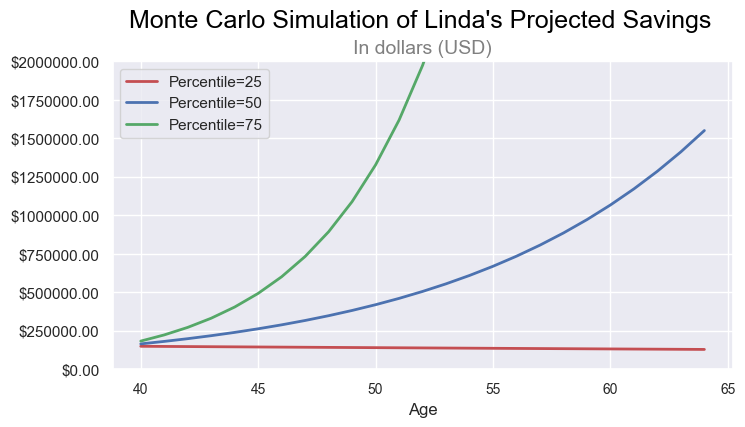

In [14]:
plots.plot_simulation_percentiles(linda, savings_simulations)